# Прогноз продаж игр для интернет-магазина «Стримчик»

Интернет-магазин «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**План:**
1. Загрузить и проверить данные.
2. Проанализировать рынок и пользователей.
3. Построить и проверить гипотезы.

## 1 Обзор данных






In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt
from scipy import stats as st

In [3]:
try:
    df = pd.read_csv('games.csv')
except:
    df = pd.read_csv('/datasets/games.csv')
df

Name Platform  Year_of_Release         Genre  \
0                         Wii Sports      Wii           2006.0        Sports   
1                  Super Mario Bros.      NES           1985.0      Platform   
2                     Mario Kart Wii      Wii           2008.0        Racing   
3                  Wii Sports Resort      Wii           2009.0        Sports   
4           Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
...                              ...      ...              ...           ...   
16710  Samurai Warriors: Sanada Maru      PS3           2016.0        Action   
16711               LMA Manager 2007     X360           2006.0        Sports   
16712        Haitaka no Psychedelica      PSV           2016.0     Adventure   
16713               Spirits & Spells      GBA           2003.0      Platform   
16714            Winning Post 8 2016      PSV           2016.0    Simulation   

       NA_sales  EU_sales  JP_sales  Other_sales  Critic_Score User_Score  \
0         41.36     28.96      3.77         8.45          76.0          8   
1         29.08      3.58      6.81         0.77           NaN        NaN   
2         15.68     12.76      3.79         3.29          82.0        8.3   
3         15.61     10.93      3.28         2.95          80.0          8   
4         11.27      8.89     10.22         1.00           NaN        NaN   
...         ...       ...       ...          ...           ...        ...   
16710      0.00      0.00      0.01         0.00           NaN        NaN   
16711      0.00      0.01      0.00         0.00           NaN        NaN   
16712      0.00      0.00      0.01         0.00           NaN        NaN   
16713      0.01      0.00      0.00         0.00           NaN        NaN   
16714      0.00      0.00      0.01         0.00           NaN        NaN   

      Rating  
0          E  
1        NaN  
2          E  
3          E  
4        NaN  
...      ...  
16710    NaN  
16711    NaN  
16712    NaN  
16713    NaN  
16714    NaN  

[16715 rows x 11 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


## 2 Предобработка данных


<div class="alert alert-info" role="alert">
Приведем названия столбцов к нижнему регистру
</div>

In [5]:
df.columns = df.columns.str.lower()
df

name platform  year_of_release         genre  \
0                         Wii Sports      Wii           2006.0        Sports   
1                  Super Mario Bros.      NES           1985.0      Platform   
2                     Mario Kart Wii      Wii           2008.0        Racing   
3                  Wii Sports Resort      Wii           2009.0        Sports   
4           Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
...                              ...      ...              ...           ...   
16710  Samurai Warriors: Sanada Maru      PS3           2016.0        Action   
16711               LMA Manager 2007     X360           2006.0        Sports   
16712        Haitaka no Psychedelica      PSV           2016.0     Adventure   
16713               Spirits & Spells      GBA           2003.0      Platform   
16714            Winning Post 8 2016      PSV           2016.0    Simulation   

       na_sales  eu_sales  jp_sales  other_sales  critic_score user_score  \
0         41.36     28.96      3.77         8.45          76.0          8   
1         29.08      3.58      6.81         0.77           NaN        NaN   
2         15.68     12.76      3.79         3.29          82.0        8.3   
3         15.61     10.93      3.28         2.95          80.0          8   
4         11.27      8.89     10.22         1.00           NaN        NaN   
...         ...       ...       ...          ...           ...        ...   
16710      0.00      0.00      0.01         0.00           NaN        NaN   
16711      0.00      0.01      0.00         0.00           NaN        NaN   
16712      0.00      0.00      0.01         0.00           NaN        NaN   
16713      0.01      0.00      0.00         0.00           NaN        NaN   
16714      0.00      0.00      0.01         0.00           NaN        NaN   

      rating  
0          E  
1        NaN  
2          E  
3          E  
4        NaN  
...      ...  
16710    NaN  
16711    NaN  
16712    NaN  
16713    NaN  
16714    NaN  

[16715 rows x 11 columns]

In [6]:
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

<div class="alert alert-info" role="alert">
Заполним пропуски года в релизе годом из названия игры
</div>

In [7]:
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

<div class="alert alert-info" role="alert">
Заменим устаревший рейтинг на новый и сделаем заглушку unknown на пропуски
</div>

In [8]:
df.loc[(df.rating == 'K-A'),'rating'] = 'E'
df.loc[(df.rating == 'RP'),'rating'] = 'unknown'
df['rating'] = df['rating'].fillna('unknown')
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [9]:
df['rating'].unique()

array(['E', 'unknown', 'M', 'T', 'E10+', 'AO', 'EC'], dtype=object)

In [10]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

<div class="alert alert-info" role="alert">
Заменим пропуски на заглушку -1
</div>

In [11]:
df.loc[(df.user_score == 'tbd'),'user_score'] = -1
df['user_score'] = df['user_score'].fillna(-1)
df['user_score'] = df['user_score'].astype('float32')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       16715 non-null  float32
 10  rating           16715 non-null  object 
dtypes: float32(1), float64(6), object(4)
memory usage: 1.3+ MB


In [12]:
df['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [13]:
df['critic_score'] = df['critic_score'].fillna(-1)

In [14]:
df.isna().sum()

name                 2
platform             0
year_of_release    269
genre                2
na_sales             0
eu_sales             0
jp_sales             0
other_sales          0
critic_score         0
user_score           0
rating               0
dtype: int64

In [15]:
df = df.dropna().copy()
df.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

In [16]:
df[df.duplicated()]

Empty DataFrame
Columns: [name, platform, year_of_release, genre, na_sales, eu_sales, jp_sales, other_sales, critic_score, user_score, rating]
Index: []

<div class="alert alert-info" role="alert">
Выведем новый столбец общими продажами.
</div>

In [17]:
df['all_sales'] = df[['na_sales','eu_sales','jp_sales']].sum(axis=1)
df

name platform  year_of_release         genre  \
0                         Wii Sports      Wii           2006.0        Sports   
1                  Super Mario Bros.      NES           1985.0      Platform   
2                     Mario Kart Wii      Wii           2008.0        Racing   
3                  Wii Sports Resort      Wii           2009.0        Sports   
4           Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
...                              ...      ...              ...           ...   
16710  Samurai Warriors: Sanada Maru      PS3           2016.0        Action   
16711               LMA Manager 2007     X360           2006.0        Sports   
16712        Haitaka no Psychedelica      PSV           2016.0     Adventure   
16713               Spirits & Spells      GBA           2003.0      Platform   
16714            Winning Post 8 2016      PSV           2016.0    Simulation   

       na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
0         41.36     28.96      3.77         8.45          76.0         8.0   
1         29.08      3.58      6.81         0.77          -1.0        -1.0   
2         15.68     12.76      3.79         3.29          82.0         8.3   
3         15.61     10.93      3.28         2.95          80.0         8.0   
4         11.27      8.89     10.22         1.00          -1.0        -1.0   
...         ...       ...       ...          ...           ...         ...   
16710      0.00      0.00      0.01         0.00          -1.0        -1.0   
16711      0.00      0.01      0.00         0.00          -1.0        -1.0   
16712      0.00      0.00      0.01         0.00          -1.0        -1.0   
16713      0.01      0.00      0.00         0.00          -1.0        -1.0   
16714      0.00      0.00      0.01         0.00          -1.0        -1.0   

        rating  all_sales  
0            E      74.09  
1      unknown      39.47  
2            E      32.23  
3            E      29.82  
4      unknown      30.38  
...        ...        ...  
16710  unknown       0.01  
16711  unknown       0.01  
16712  unknown       0.01  
16713  unknown       0.01  
16714  unknown       0.01  

[16444 rows x 12 columns]

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float32
 10  rating           16444 non-null  object 
 11  all_sales        16444 non-null  float64
dtypes: float32(1), float64(7), object(4)
memory usage: 1.6+ MB


In [19]:
df['year_of_release'] = df['year_of_release'].astype('int')
df['year_of_release']

0        2006
1        1985
2        2008
3        2009
4        1996
         ... 
16710    2016
16711    2006
16712    2016
16713    2003
16714    2016
Name: year_of_release, Length: 16444, dtype: int32

## 3 Анализ данных


<div class="alert alert-info" role="alert">
Посмотрим сколько игр выпускалось по годам.
</div>

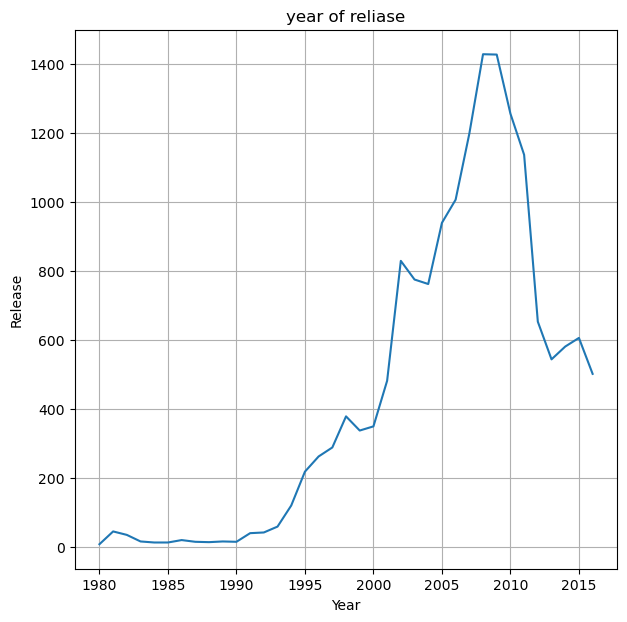

In [62]:
df.groupby('year_of_release')['name'].count().plot(grid=True,figsize=(7,7),xlabel='Year',ylabel='Release',title='year of reliase');

<div class="alert alert-info" role="alert">
Большая часть игр выпускалась в 2008-2009 годах
</div>

<div class="alert alert-info" role="alert">
Узнаем топ платформ.
</div>

In [21]:
df.groupby('platform')['all_sales'].sum().sort_values(ascending=False).reset_index()

platform  all_sales
0       PS2    1043.09
1      X360     876.36
2       Wii     813.47
3       PS3     796.75
4        DS     743.74
5        PS     686.89
6       GBA     305.27
7       PS4     265.79
8       PSP     248.77
9        GB     246.27
10      NES     245.74
11      3DS     244.54
12       XB     243.09
13       PC     233.88
14      N64     213.70
15     SNES     196.82
16       GC     191.60
17     XOne     145.05
18     2600      85.64
19     WiiU      76.24
20      PSV      47.38
21      SAT      33.52
22      GEN      27.46
23       DC      15.68
24      SCD       1.81
25       NG       1.44
26       WS       1.42
27     TG16       0.16
28      3DO       0.10
29       GG       0.04
30     PCFX       0.03

In [22]:
top_platform = df.groupby('platform')['all_sales'].sum().sort_values(ascending=False).head(5).reset_index()
top_platform['platform'].unique()

array(['PS2', 'X360', 'Wii', 'PS3', 'DS'], dtype=object)

<div class="alert alert-info" role="alert">
Проанализируем данные по топ 5 платформам.
</div>

In [23]:
list_platform = (['PS2', 'X360', 'Wii', 'PS3', 'DS'])
df_top_platform = df.query('platform in @list_platform')
df_top_platform

name platform  \
0                                            Wii Sports      Wii   
2                                        Mario Kart Wii      Wii   
3                                     Wii Sports Resort      Wii   
6                                 New Super Mario Bros.       DS   
7                                              Wii Play      Wii   
...                                                 ...      ...   
16700                          Mezase!! Tsuri Master DS       DS   
16704                                          Plushees       DS   
16709  SCORE International Baja 1000: The Official Game      PS2   
16710                     Samurai Warriors: Sanada Maru      PS3   
16711                                  LMA Manager 2007     X360   

       year_of_release       genre  na_sales  eu_sales  jp_sales  other_sales  \
0                 2006      Sports     41.36     28.96      3.77         8.45   
2                 2008      Racing     15.68     12.76      3.79         3.29   
3                 2009      Sports     15.61     10.93      3.28         2.95   
6                 2006    Platform     11.28      9.14      6.50         2.88   
7                 2006        Misc     13.96      9.18      2.93         2.84   
...                ...         ...       ...       ...       ...          ...   
16700             2009      Sports      0.00      0.00      0.01         0.00   
16704             2008  Simulation      0.01      0.00      0.00         0.00   
16709             2008      Racing      0.00      0.00      0.00         0.00   
16710             2016      Action      0.00      0.00      0.01         0.00   
16711             2006      Sports      0.00      0.01      0.00         0.00   

       critic_score  user_score   rating  all_sales  
0              76.0         8.0        E      74.09  
2              82.0         8.3        E      32.23  
3              80.0         8.0        E      29.82  
6              89.0         8.5        E      26.92  
7              58.0         6.6        E      26.07  
...             ...         ...      ...        ...  
16700          -1.0        -1.0  unknown       0.01  
16704          -1.0        -1.0        E       0.01  
16709          -1.0        -1.0  unknown       0.00  
16710          -1.0        -1.0  unknown       0.01  
16711          -1.0        -1.0  unknown       0.01  

[8072 rows x 12 columns]

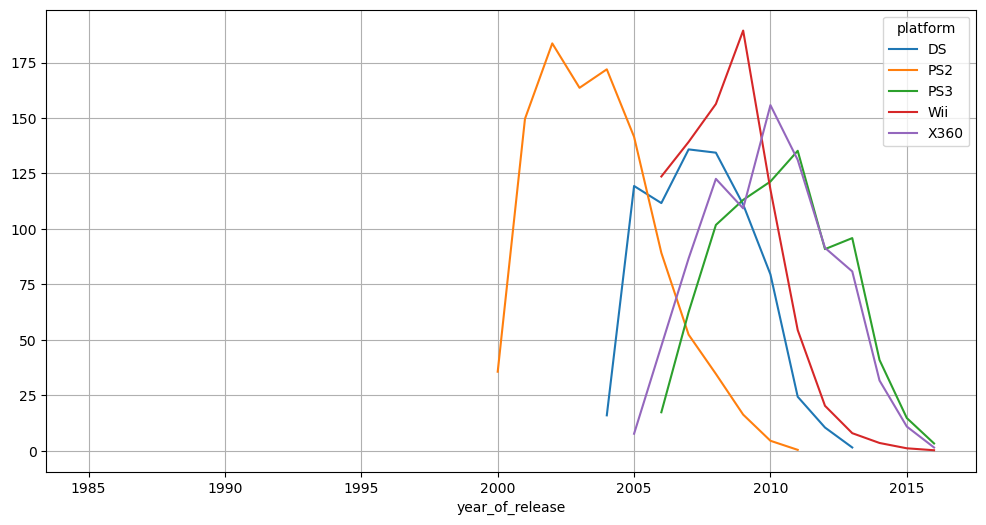

In [24]:
(df_top_platform
    .pivot_table(index = 'year_of_release',
                 columns = 'platform' , 
                 values = 'all_sales',
                 aggfunc = 'sum')
 .plot(grid=True,figsize=(12,6)));

<div class="alert alert-info" role="alert">
В среднем платформа живет около 10 лет.

Для прогноза на 2016 год оставим данные от 2014 года.
</div>

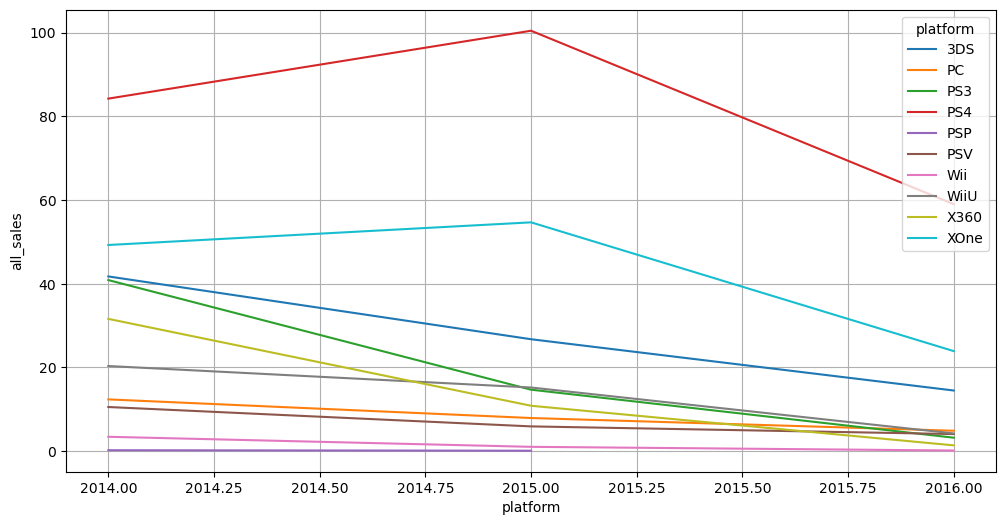

In [53]:
df_top_platform = df.query('year_of_release >= 2014')
(df_top_platform
    .pivot_table(index = 'year_of_release',
                 columns = 'platform' , 
                 values = 'all_sales',
                 aggfunc = 'sum')
 .plot(grid=True,figsize=(12,6),xlabel='platform',ylabel='all_sales'));

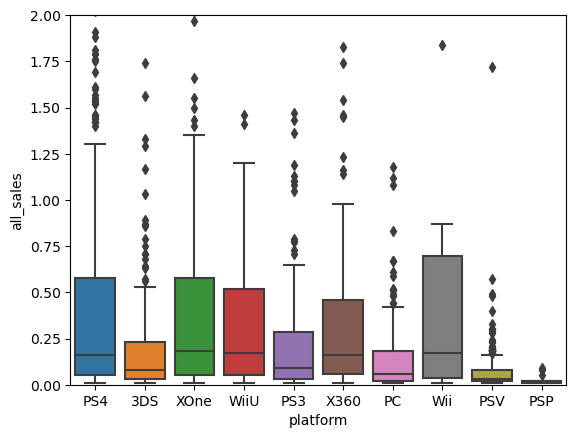

In [26]:
sns.boxplot(data= df_top_platform,x='platform',y='all_sales').set_ylim([0, 2]);

<div class="alert alert-info" role="alert">
Посмотрим на зависимость продаж от рейтингов.
</div>

In [27]:
df_top_platform['platform'].unique()

array(['PS4', '3DS', 'XOne', 'WiiU', 'PS3', 'X360', 'PC', 'Wii', 'PSV',
       'PSP'], dtype=object)

In [28]:
XOne = df_top_platform.query('platform == "XOne"')
PS4 = df_top_platform.query('platform == "PS4"')
Wii = df_top_platform.query('platform == "Wii"')
X360 = df_top_platform.query('platform == "X360"')

In [29]:
f,axs = plt.subplots(1,2,figsize=(12,6))
axs[0].scatter(XOne['critic_score'],XOne['all_sales'])
axs[0].grid()
axs[0].set_title('Критики')
axs[0].set_xlabel('Оценка')
axs[0].set_ylabel('Продажи')

axs[1].scatter(XOne['user_score'],XOne['all_sales'])
axs[1].grid()
axs[1].set_title('Пользователи')
axs[1].set_xlabel('Оценка')
axs[1].set_ylabel('Продажи')

plt.suptitle('Продажи к оценке XOne');
display(XOne[['critic_score','all_sales']].corr())
XOne[['user_score','all_sales']].corr()

critic_score  all_sales
critic_score      1.000000   0.271821
all_sales         0.271821   1.000000

user_score  all_sales
user_score    1.000000   0.107001
all_sales     0.107001   1.000000

In [30]:
f,axs = plt.subplots(1,2,figsize=(12,6))
axs[0].scatter(PS4['critic_score'],PS4['all_sales'])
axs[0].grid()
axs[0].set_title('Критики')
axs[0].set_xlabel('Оценка')
axs[0].set_ylabel('Продажи')

axs[1].scatter(PS4['user_score'],PS4['all_sales'])
axs[1].grid()
axs[1].set_title('Пользователи')
axs[1].set_xlabel('Оценка')
axs[1].set_ylabel('Продажи')

plt.suptitle('Продажи к оценке PS4');
display(PS4[['critic_score','all_sales']].corr())
PS4[['user_score','all_sales']].corr()

critic_score  all_sales
critic_score      1.000000   0.210027
all_sales         0.210027   1.000000

user_score  all_sales
user_score    1.000000   0.103328
all_sales     0.103328   1.000000

critic_score  all_sales
critic_score           NaN        NaN
all_sales              NaN        1.0

user_score  all_sales
user_score    1.000000   0.776584
all_sales     0.776584   1.000000

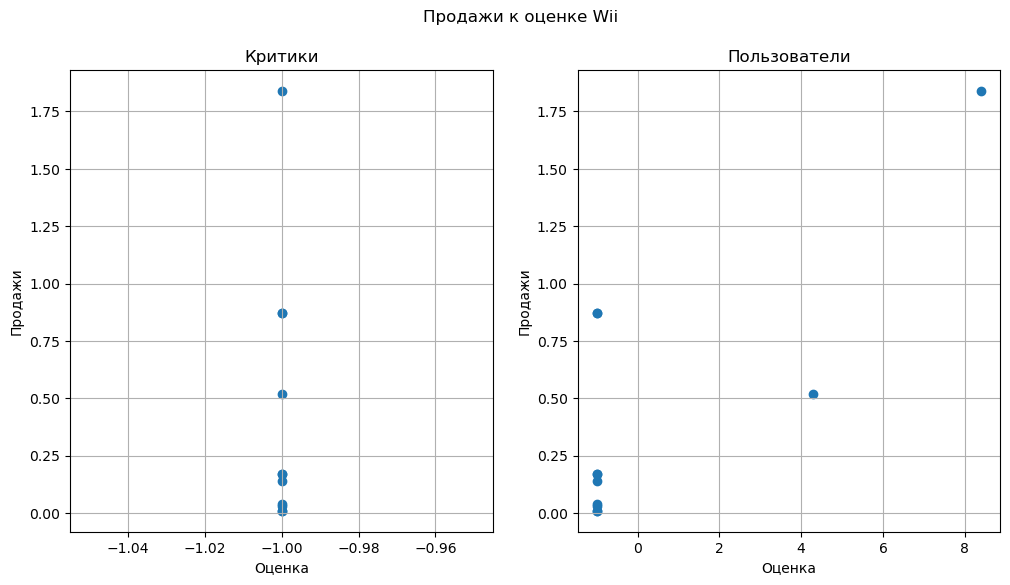

In [31]:
f,axs = plt.subplots(1,2,figsize=(12,6))
axs[0].scatter(Wii['critic_score'],Wii['all_sales'])
axs[0].grid()
axs[0].set_title('Критики')
axs[0].set_xlabel('Оценка')
axs[0].set_ylabel('Продажи')

axs[1].scatter(Wii['user_score'],Wii['all_sales'])
axs[1].grid()
axs[1].set_title('Пользователи')
axs[1].set_xlabel('Оценка')
axs[1].set_ylabel('Продажи')

plt.suptitle('Продажи к оценке Wii');
display(Wii[['critic_score','all_sales']].corr())
Wii[['user_score','all_sales']].corr()

critic_score  all_sales
critic_score      1.000000   0.004142
all_sales         0.004142   1.000000

user_score  all_sales
user_score    1.000000   0.083493
all_sales     0.083493   1.000000

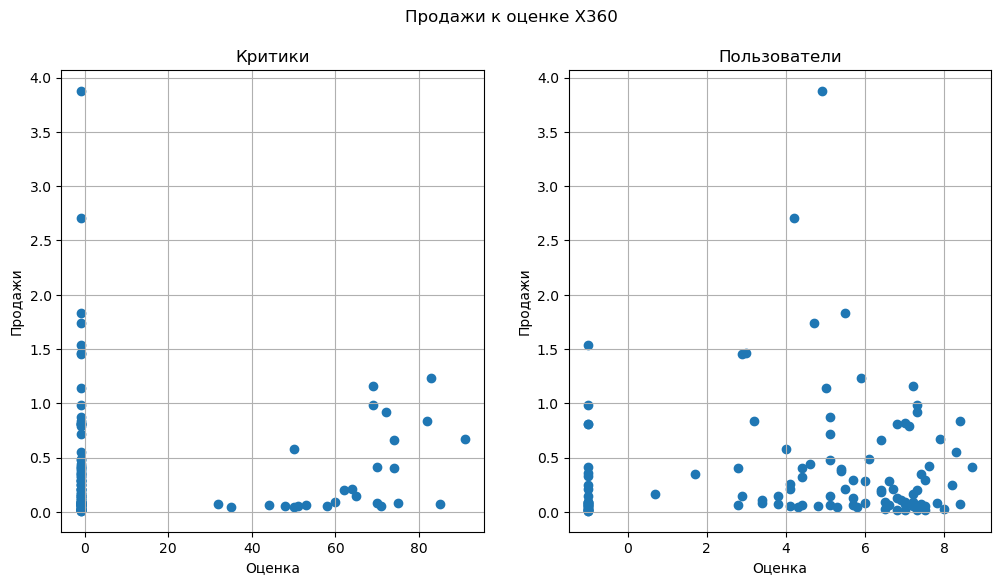

In [32]:
f,axs = plt.subplots(1,2,figsize=(12,6))
axs[0].scatter(X360['critic_score'],X360['all_sales'])
axs[0].grid()
axs[0].set_title('Критики')
axs[0].set_xlabel('Оценка')
axs[0].set_ylabel('Продажи')

axs[1].scatter(X360['user_score'],X360['all_sales'])
axs[1].grid()
axs[1].set_title('Пользователи')
axs[1].set_xlabel('Оценка')
axs[1].set_ylabel('Продажи')

plt.suptitle('Продажи к оценке X360');
display(X360[['critic_score','all_sales']].corr())
X360[['user_score','all_sales']].corr()

<div class="alert alert-info" role="alert">
По графикам видно: есть небольшая связь продаж от оценки пользователей Wii.По остальным связь очень мало,почти нет. 
</div>

<div class="alert alert-info" role="alert">
Посмотрим доходность по жанрам.
</div>

In [33]:
df_top_platform.groupby('genre')['all_sales'].sum().sort_values(ascending=False)

genre
Action          176.79
Shooter         149.41
Sports           95.12
Role-Playing     92.80
Misc             33.52
Fighting         25.49
Racing           24.63
Platform         16.28
Adventure        15.73
Simulation       12.24
Strategy          3.72
Puzzle            2.10
Name: all_sales, dtype: float64

In [34]:
df_top_platform.groupby('genre')['all_sales'].median().sort_values(ascending=False)

genre
Shooter         0.475
Sports          0.170
Fighting        0.115
Platform        0.115
Role-Playing    0.100
Simulation      0.095
Misc            0.090
Action          0.080
Racing          0.080
Strategy        0.060
Puzzle          0.045
Adventure       0.030
Name: all_sales, dtype: float64

In [35]:
df_top_platform.groupby('genre')['all_sales'].mean().sort_values(ascending=False)

genre
Shooter         1.167266
Sports          0.590807
Platform        0.428421
Fighting        0.424833
Role-Playing    0.419910
Racing          0.356957
Misc            0.296637
Action          0.285606
Simulation      0.278182
Puzzle          0.150000
Strategy        0.100541
Adventure       0.085027
Name: all_sales, dtype: float64

<div class="alert alert-info" role="alert">
Больше всего заплатили за Action,по среднем и медиане на игру лидирует Shooter              
</div>

## 4 портрет пользователя каждого региона


In [36]:
df_top_platform.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head()

platform
PS4     98.61
XOne    81.27
X360    28.30
3DS     22.64
PS3     22.05
Name: na_sales, dtype: float64

In [37]:
df_top_platform.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head()

genre
Shooter         79.02
Action          72.53
Sports          46.13
Role-Playing    33.47
Misc            15.05
Name: na_sales, dtype: float64

In [38]:
df_top_platform.groupby('rating')['na_sales'].sum().sort_values(ascending=False)

rating
M          96.42
unknown    64.72
E          50.74
T          38.95
E10+       33.23
Name: na_sales, dtype: float64

<div class="alert alert-info" role="alert">
Американцы больше всего заплатили за Shooter на PS4,преобладают игры с рейтингом ESRB 'M'.
</div>

In [39]:
df_top_platform.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head()

platform
PS4     130.04
XOne     46.25
PS3      25.54
PC       17.97
3DS      16.12
Name: eu_sales, dtype: float64

In [40]:
df_top_platform.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head()

genre
Action          74.68
Shooter         65.52
Sports          45.73
Role-Playing    28.17
Racing          14.13
Name: eu_sales, dtype: float64

In [41]:
df_top_platform.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)

rating
M          93.44
unknown    58.95
E          58.06
T          34.07
E10+       26.16
Name: eu_sales, dtype: float64

<div class="alert alert-info" role="alert">
Американцы и европейцы больше всего заплатили за Shooter на PS4,преобладают игры с рейтингом ESRB 'M'.
</div>

In [42]:
df_top_platform.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head()

platform
3DS     44.24
PS4     15.02
PSV     14.54
PS3     11.22
WiiU     7.31
Name: jp_sales, dtype: float64

In [43]:
df_top_platform.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head()

genre
Role-Playing    31.16
Action          29.58
Fighting         6.37
Misc             5.61
Shooter          4.87
Name: jp_sales, dtype: float64

In [44]:
df_top_platform.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)

rating
unknown    56.90
T          14.78
E           8.94
M           8.01
E10+        4.46
Name: jp_sales, dtype: float64

<div class="alert alert-info" role="alert">
лидером у японцев являются Action,в приоритете используют 3DS платформу.О ESRB судить не получится,пропусков больше половины.
</div>

## 5 Проверка гипотез


 H0: Средние пользовательские рейтинги платформ Xbox One и PC равны.
 
 H1: Средние пользовательские рейтинги платформ Xbox One и PC не равны.

In [45]:
xbox = df_top_platform.query('platform == "XOne" & user_score != -1')
PC = df_top_platform.query('platform == "PC" & user_score != -1')
alpha = .05
results = st.ttest_ind(xbox['user_score'],PC['user_score'])
if results.pvalue < alpha:
    display('Отвергаем H0')
else:
    display('Гипотеза верна')
display(results.pvalue)

'Гипотеза верна'

0.10450648637161196

H0: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») равны.
H1:Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования»)    не равны.

In [46]:
action = df_top_platform.query('genre == "Action" & user_score != -1')
sports = df_top_platform.query('genre == "Sports" & user_score != -1')
alpha = .05
results = st.ttest_ind(action['user_score'],sports['user_score'])
if results.pvalue < alpha:
    display('Отвергаем H0')
else:
    display('Гипотеза верна')
display(results.pvalue)

'Отвергаем H0'

2.871148452488903e-19

In [47]:
df_top_platform.groupby('platform')['user_score'].mean().sort_values()

platform
PSP    -1.000000
Wii     0.336364
3DS     1.111321
PSV     1.142034
PS3     2.138813
PS4     4.038298
X360    4.063063
WiiU    4.317808
XOne    4.496053
PC      4.896689
Name: user_score, dtype: float32

<div class="alert alert-info" role="alert">
Гипотеза о том что средние пользовательские рейтинги платформ Xbox One и PC равны,верна
    
Гипотеза о том что Action и Sports имеют значимые различия в пользовательских рейтингах верна.
</div>

## 6 Вывод


Загрузили и обработали дуюликаты и пропуски,большую часть удалось заполнить заглушками.

Построили графики и проанализировали данные,рассмотрели важность признаков разных платформ,стран,жанров по истории продаж игр до 2016 года.Для прогноза продаж на 2017 можем сделать следующие выводы:

    -- Для американцев и европецев упор нужен на Shooter на платформах X360 и PS4.
    
    -- Лучший способ заинтересовать японца,предложить ему Action на платформе DS3.
    
    -- Игры категории "M" будут рентабельней.
    
    --Можно сильно не придерживаться рейтингов пользователей и критиков.Продажи и рейтинги оказались слабо связаны (это не относится к отдельно сильно выдающимся играм)

Проверили 2 гипотезы: 

    -- H0: Средние пользовательские рейтинги платформ Xbox One и PC равны. Результат: гипотеза верна
    -- H1: Средние пользовательские рейтинги платформ Xbox One и PC не равны. Результат: гипотеза не верна